`-` 학습3: torch.nn.CrossEntropyLoss() 이용 

(예비학습1) softmax 

In [434]:
sftmax = torch.nn.Softmax(dim=1)

In [463]:
_x = torch.tensor([[0,0,1,2]]).float()

In [464]:
sftmax(_x)

tensor([[0.0826, 0.0826, 0.2245, 0.6103]])

In [465]:
torch.exp(_x)/torch.exp(_x).sum()

tensor([[0.0826, 0.0826, 0.2245, 0.6103]])

특징1: 총합이1이다 -> 확률의 역할을 함 

특징2: 파라메터의 잉여성 

In [438]:
_x1 = torch.tensor([[0,0,1,2]]).float()
_x2 = torch.tensor([[1,1,2,3]]).float()
_x3 = torch.tensor([[11,11,12,13]]).float()

In [439]:
sftmax(_x1),sftmax(_x2),sftmax(_x3)

(tensor([[0.0826, 0.0826, 0.2245, 0.6103]]),
 tensor([[0.0826, 0.0826, 0.2245, 0.6103]]),
 tensor([[0.0826, 0.0826, 0.2245, 0.6103]]))

(예비학습2) 원핫인코딩 

- $\text{label}=\begin{bmatrix}"3" \\ \dots \\ "3" \\ "7" \\ \dots \\ "7" \end{bmatrix},\quad \boldsymbol{y}=\begin{bmatrix}0 \\ \dots \\ 0 \\ 1 \\ \dots \\ 1 \end{bmatrix},\quad \boldsymbol{y}_{onehot}=\begin{bmatrix} 1 & 0 \\ \dots & \dots \\ 1 & 0 \\ 0 & 1 \\ \dots & \dots \\ 0 & 1 \end{bmatrix}$

In [440]:
yonehot = torch.tensor([[1.0,0.0]]*len(three_tensor) + [[0.0,1.0]]*len(seven_tensor))
#y = torch.tensor([0.0]*len(three_tensor) + [1.0]*len(seven_tensor)).reshape(-1,1) 

In [441]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,30),
    torch.nn.ReLU(),
    torch.nn.Linear(30,2)
)

In [442]:
loss_fn = torch.nn.CrossEntropyLoss() 

In [443]:
optimizr = torch.optim.Adam(net.parameters())

In [444]:
for epoc in range(200):
    ## 1
    yhat = net(Xnp) 
    ## 2 
    loss = loss_fn(yhat,yonehot) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [459]:
net(Xnp)

tensor([[ 0.9389, -3.0820],
        [ 3.9282, -7.1735],
        [ 2.5159, -4.2622],
        ...,
        [-3.2389,  1.6134],
        [-5.3381,  3.4134],
        [-5.8182,  4.0986]], grad_fn=<AddmmBackward0>)

In [445]:
sftmax(net(Xnp))

tensor([[9.8238e-01, 1.7621e-02],
        [9.9998e-01, 1.5086e-05],
        [9.9886e-01, 1.1372e-03],
        ...,
        [7.7495e-03, 9.9225e-01],
        [1.5819e-04, 9.9984e-01],
        [4.9334e-05, 9.9995e-01]], grad_fn=<SoftmaxBackward0>)

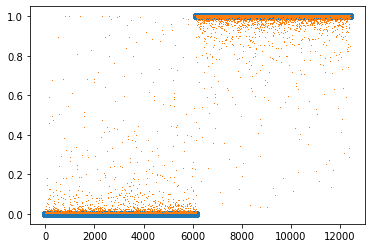

In [447]:
plt.plot(y,'o')
plt.plot(sftmax(net(Xnp)).data[:,1],',')